---

# First: How to use multiple dispatch?

Newton's method for finding the root of a function, i.e. where $f(\theta) = 0$:

$$
\theta_{t+1} = \theta_t - \frac{F(\theta_t)}{F'(\theta_t)}
$$

Suppose I want to use Newton's method to find the quantiles of various probability distributions.
- I to find $\theta$ such that $F(\theta) = q$ for cumulative distribution function $F$ and quantile $0<q<1$.

In [75]:
using Distributions

function my_quantile(d, q)
    θ = mean(d)
    for i in 1:20
        θ -= (cdf(d, θ) - q) / pdf(d, θ)
    end
    θ
end

my_quantile (generic function with 1 method)

In [76]:
using Interact, StatsPlots

@manipulate for d in [Normal(), Uniform(), Gamma(5,3), Beta(3,7), Exponential()], q in 0.01:0.01:0.99
    plot(d)
    x, y = quantile(d, q), my_quantile(d, q)
    vline!([y], lab="My Function: $(round(y, digits=4))", line=(4, :dot))
    vline!([x], lab="True Quantile: $(round(x, digits=4))", color=:black)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["d"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "Normal{Float64}(μ=0.0, σ=1.0)","val" => 1,"id" => "id1tVnIjvs"), OrderedDict{String,Any}("key" => "Uniform{Float64}(a=0.0, b=1.0)","val" => 2,"id" => "iddogfrHwb"), OrderedDict{String,Any}("key" => "Gamma{Float64}(α=5.0, θ=3.0)","val" => 3,"id" => "idElbTq8yR"), OrderedDict{String,Any}("key" => "Beta{Float64}(α=3.0, β=7.0)","val" => 4,"id" => "idlNaicevp"), OrderedDict{String,Any}("key" => "Exponential{Float64}(θ=1.0)","val" => 5,"id" => "id4PBUWziD")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/joday/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/joday/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/joday/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/joday/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/joday/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000114289d50, Task (runnable) @0x0000000114289d50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return

---

<img src="https://user-images.githubusercontent.com/8075494/57313750-3d890d80-70be-11e9-99c9-b3fe0de6ea81.png" align="center" width=500>

# What is OnlineStats?

**OnlineStats calculates statistics, models, and big data visualizations via online algorithms.**

- Well suited for streaming data or when data is too large to hold in memory.
- Processes observations one by one and all algorithms use O(1) memory.

# Quickstart

In [77]:
import Pkg

Pkg.add("OnlineStats")

using OnlineStats

o = Series(Mean(), Variance(), P2Quantile(), Extrema())

fit!(o, randn(10^6))

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


Series
  ├── Mean: n=1000000 | value=0.00150193
  ├── Variance: n=1000000 | value=1.00076
  ├── P2Quantile (0.5): n=1000000 | value=0.001282456232327278
  └── Extrema: n=1000000 | value=(-4.37291, 4.64943)

# Overview

## Fit one observation at a time

In [78]:
o = Mean()

fit!(o, 0)

Mean: n=1 | value=0.0

## Use type system to identify when to iterate

`Mean <: OnlineStat{Number}`

- `fit!(o, 1)` -> fit directly
- `fit!(o, 1:10)` -> iterate through and `fit!` each element

In [79]:
fit!(o, 1:10)

Mean: n=11 | value=5.0

## Distributed Parallelism

- Most stats can also be merged together.

<img src="https://user-images.githubusercontent.com/8075494/57345083-95079780-7117-11e9-81bf-71b0469f04c7.png" align="center" width=300>

In [80]:
using Distributed
nprocs() == 1 && addprocs(3)
@everywhere using OnlineStats

@distributed merge for i in 1:3
    s = fit!(Series(Mean(), Variance()), randn(10_000))
end

Series
  ├── Mean: n=30000 | value=-0.00595452
  └── Variance: n=30000 | value=1.00446

## Plot Things

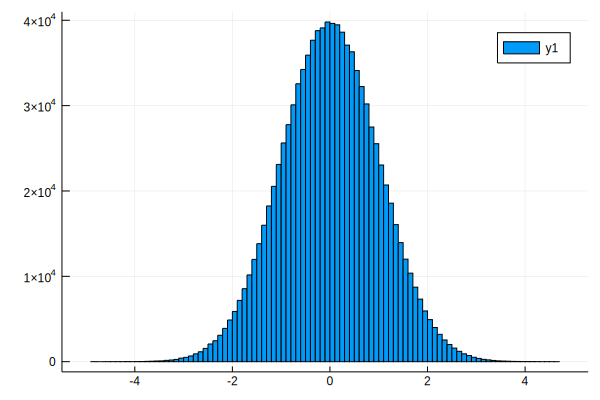

In [81]:
o = Hist(-5:.1:5)

fit!(o, randn(10^6))

plot(o)

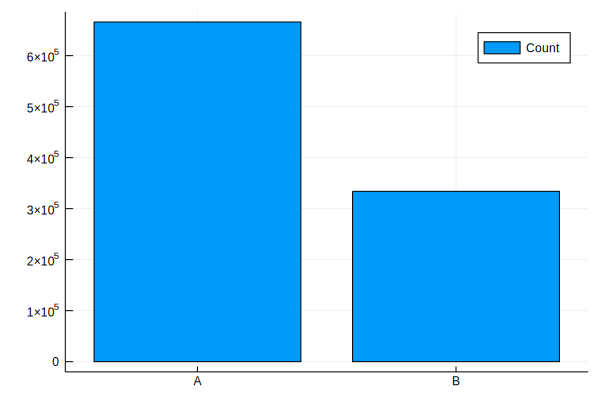

In [82]:
o = CountMap(String)

fit!(o, rand(["A", "A", "B"], 10^6))

plot(o)

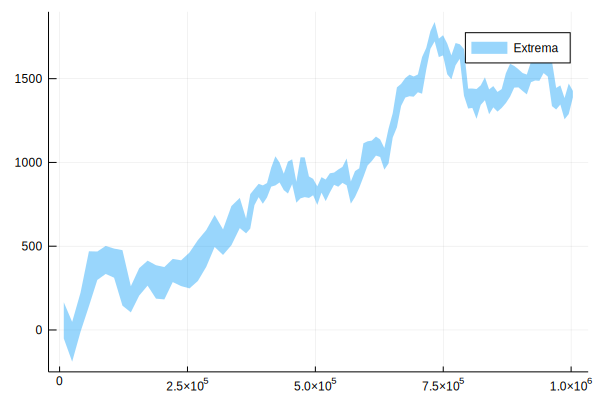

In [83]:
o = Partition(Extrema())

fit!(o, cumsum(randn(10^6)))

plot(o)

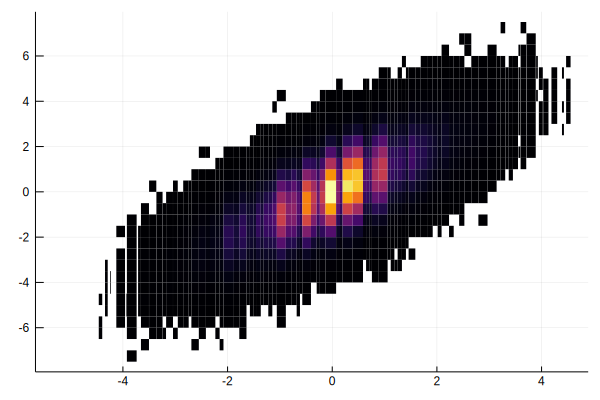

In [84]:
o = IndexedPartition(Float64, Hist(-10:.5:10))

x = randn(10^6)
y = x .+ randn(10^6)

fit!(o, zip(x, y))

plot(o)

# Statistics Directly from CSV

- For this example, we are looking at the trip data for every yellow taxi in NYC during December 2018.
- https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

## 1) Register data with DataDeps.jl

- Super helpful for reproducibility
- Downloads data only if you don't already have it

In [85]:
using DataDeps

register(DataDep(
    "nyc-taxi", 
    "About to download ~700MB",
    "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv"
))

path = datadep"nyc-taxi/yellow_tripdata_2018-12.csv"

┌ Warning: Over-writing registration of the datadep
│   name = nyc-taxi
└ @ DataDeps /Users/joday/.julia/packages/DataDeps/yerzH/src/registration.jl:8


"/Users/joday/.julia/datadeps/nyc-taxi/yellow_tripdata_2018-12.csv"

## 2) Quick inspection of file

In [86]:
;head $path

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount

1,2018-12-01 00:28:22,2018-12-01 00:44:07,2,2.50,1,N,148,234,1,12,0.5,0.5,3.95,0,0.3,17.25
1,2018-12-01 00:52:29,2018-12-01 01:11:37,3,2.30,1,N,170,144,1,13,0.5,0.5,2.85,0,0.3,17.15
2,2018-12-01 00:12:52,2018-12-01 00:36:23,1,.00,1,N,113,193,2,2.5,0.5,0.5,0,0,0.3,3.8
1,2018-12-01 00:35:08,2018-12-01 00:43:11,1,3.90,1,N,95,92,1,12.5,0.5,0.5,2.75,0,0.3,16.55
1,2018-12-01 00:21:54,2018-12-01 01:15:13,1,12.80,1,N,163,228,1,45,0.5,0.5,9.25,0,0.3,55.55
1,2018-12-01 00:00:38,2018-12-01 00:29:26,1,18.80,1,N,132,97,1,50.5,0.5,0.5,10.35,0,0.3,62.15
1,2018-12-01 00:59:39,2018-12-01 01:09:07,1,1.00,1,N,246,164,1,7.5,0.5,0.5,0.44,0,0.3,9.24
1,2018-12-01 00:19:19,2018-12-01 00:22:19,1,.30,1,N,161,163,4,4,0.5,0.5,0,0,0.3,5.3


## 3) Iterate through rows

- Lazily read the data and parse it into the data type we want (`Int`)
- Add each value to our `CountMap`

In [87]:
using Plots, OnlineStats, CSV, Parsers

o = CountMap(Int)

@time for row in CSV.Rows(path; reusebuffer=true, skipto=3)
    fit!(o, Parsers.parse(Int, row.passenger_count))
end

  3.402083 seconds (32.69 M allocations: 1.218 GiB, 8.76% gc time)


**Note this is faster than loading the entire dataset**

In [88]:
@time CSV.read(path, skipto=3)

  7.740764 seconds (3.57 M allocations: 300.681 MiB, 20.45% gc time)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance
,Int64,String,String,Int64,Float64
1,1,2018-12-01 00:28:22,2018-12-01 00:44:07,2,2.5
2,1,2018-12-01 00:52:29,2018-12-01 01:11:37,3,2.3
3,2,2018-12-01 00:12:52,2018-12-01 00:36:23,1,0.0
4,1,2018-12-01 00:35:08,2018-12-01 00:43:11,1,3.9
5,1,2018-12-01 00:21:54,2018-12-01 01:15:13,1,12.8
6,1,2018-12-01 00:00:38,2018-12-01 00:29:26,1,18.8
7,1,2018-12-01 00:59:39,2018-12-01 01:09:07,1,1.0
8,1,2018-12-01 00:19:19,2018-12-01 00:22:19,1,0.3
9,1,2018-12-01 00:41:41,2018-12-01 01:09:02,1,3.3


## 4) Plot

Total Number of Yellow Taxi Rides in Dec 2018: 8173231


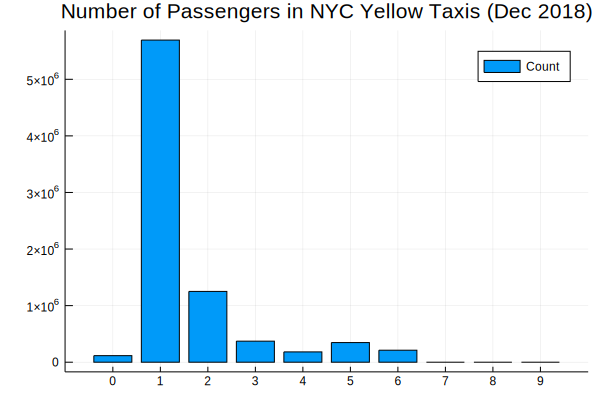

In [89]:
sort!(o.value)
println("Total Number of Yellow Taxi Rides in Dec 2018: $(nobs(o))")
plot(o, title="Number of Passengers in NYC Yellow Taxis (Dec 2018)")